In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np

import sys
sys.path.append('../src') 
from data_prep_pipeline import DataPrepPipeline

DATA_PATH = '../data/Diabetes Missing Data.csv' 
pipeline = DataPrepPipeline(DATA_PATH)

In [2]:
#  Load the dataset
df_raw = pipeline.load_data()

if df_raw is not None:
    print("\nSuccessfully loaded DataFrame:")
    display(df_raw.head())

Loading data from: ../data/Diabetes Missing Data.csv
Data loaded successfully.

Successfully loaded DataFrame:


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1



--- Initial Data Exploration ---
Shape: (768, 9)

Data Types:
Pregnant               int64
Glucose              float64
Diastolic_BP         float64
Skin_Fold            float64
Serum_Insulin        float64
BMI                  float64
Diabetes_Pedigree    float64
Age                    int64
Class                  int64
dtype: object

First 5 Rows:
   Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0         6    148.0          72.0       35.0            NaN  33.6   
1         1     85.0          66.0       29.0            NaN  26.6   
2         8    183.0          64.0        NaN            NaN  23.3   
3         1     89.0          66.0       23.0           94.0  28.1   
4         0    137.0          40.0       35.0          168.0  43.1   

   Diabetes_Pedigree  Age  Class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1  

Summary Statist

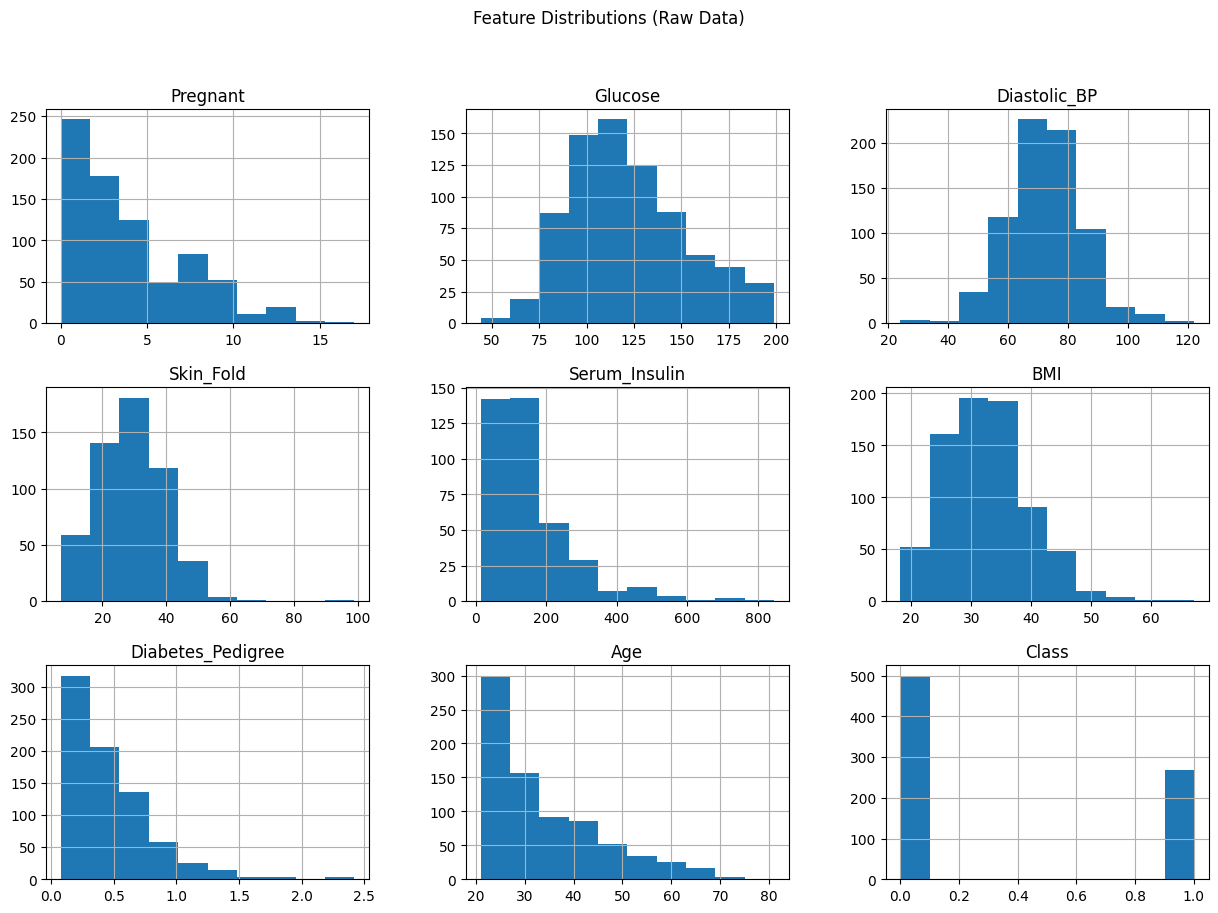

In [3]:
# Initial Exploration and Quality Issues
quality_report = pipeline.initial_exploration()

print("\n--- Initial Data Assessment Report ---")
print("Data Shape:", pipeline.df.shape)
print("Target Class Distribution (Class):")
print(pipeline.df['Class'].value_counts(normalize=True))

print("\nBiological Impossibilities (Zeros):")
print(pd.DataFrame(quality_report).T)

pipeline.df.hist(figsize=(15, 10))
plt.suptitle("Feature Distributions (Raw Data)")
plt.show()


--- Missing Value Analysis ---
**Glucose**: 5 missing values (0.65%)
**Diastolic_BP**: 35 missing values (4.56%)
**Skin_Fold**: 227 missing values (29.56%)
**Serum_Insulin**: 374 missing values (48.70%)
**BMI**: 11 missing values (1.43%)

Missing Data Percentages After Zero-to-NaN Conversion:
                  Percent
Serum_Insulin      48.70%
Diastolic_BP        4.56%
Skin_Fold          29.56%
BMI                 1.43%
Glucose             0.65%
Pregnant            0.00%
Diabetes_Pedigree   0.00%
Age                 0.00%
Class               0.00%




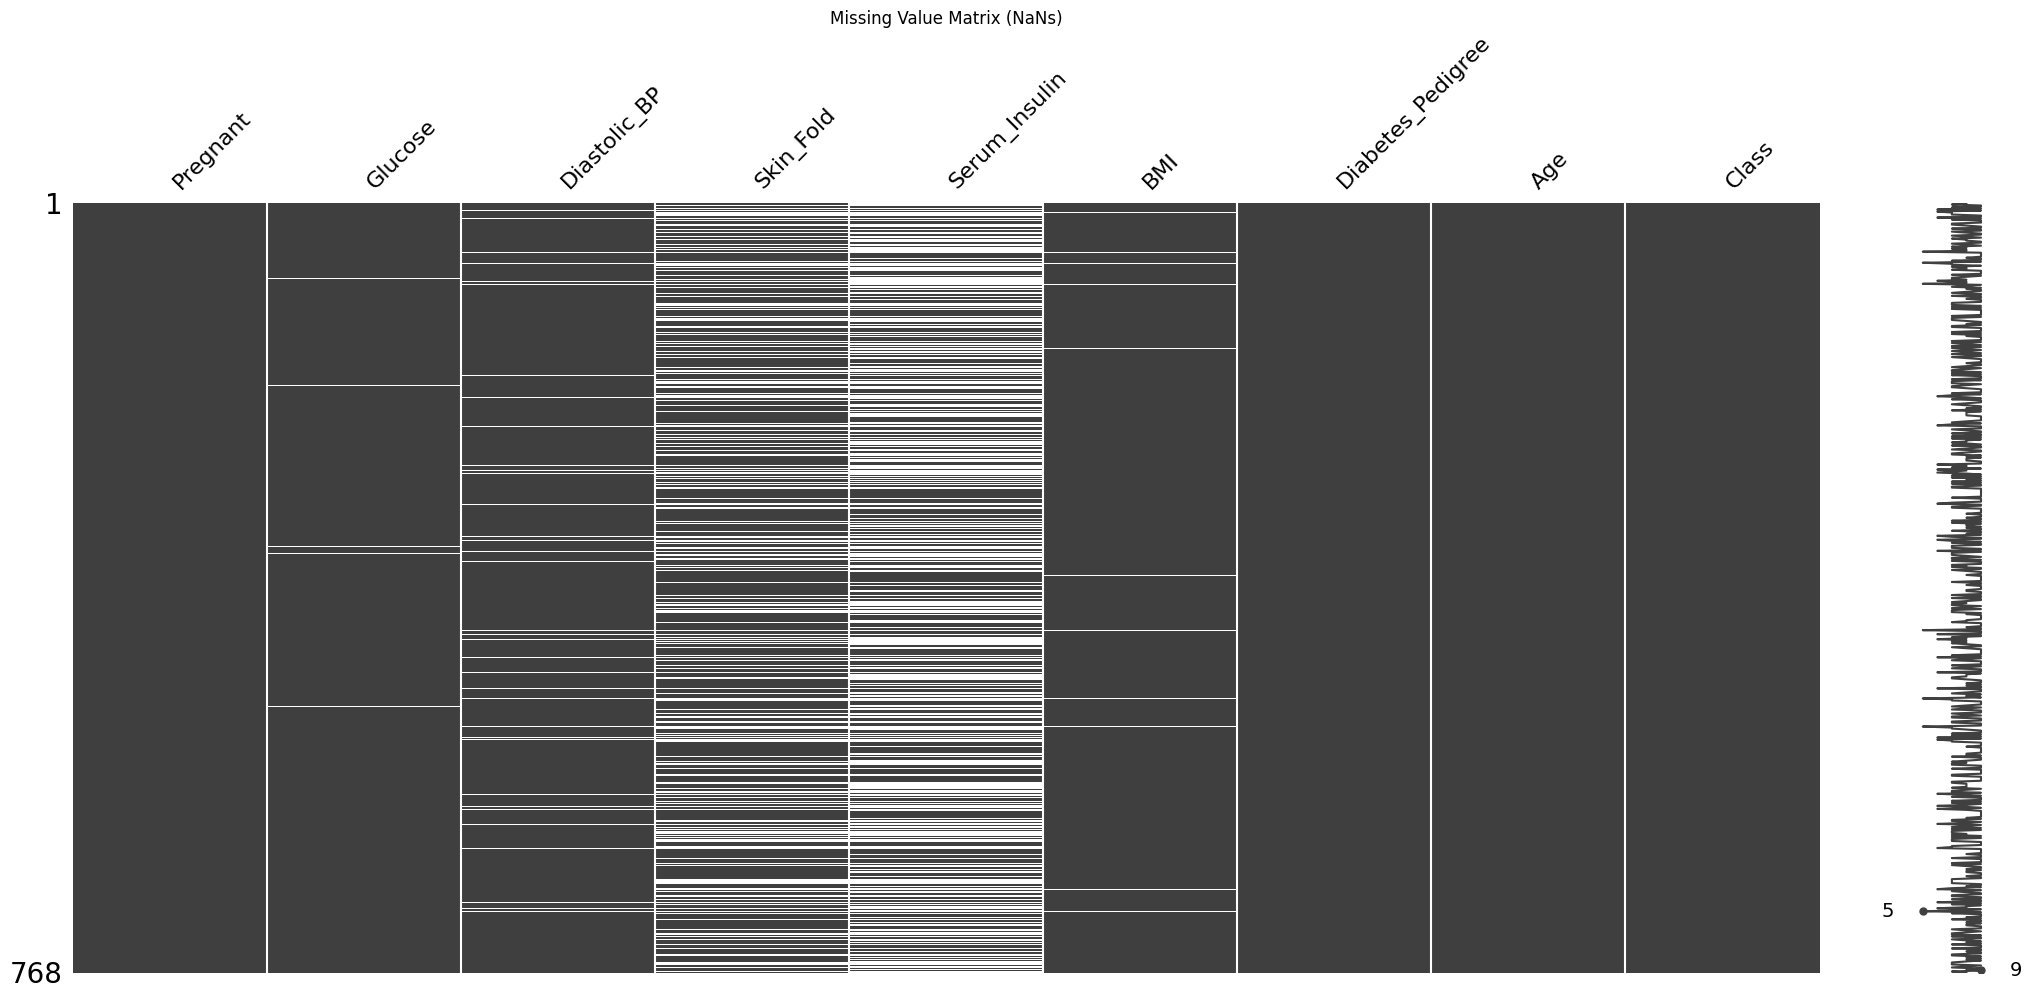

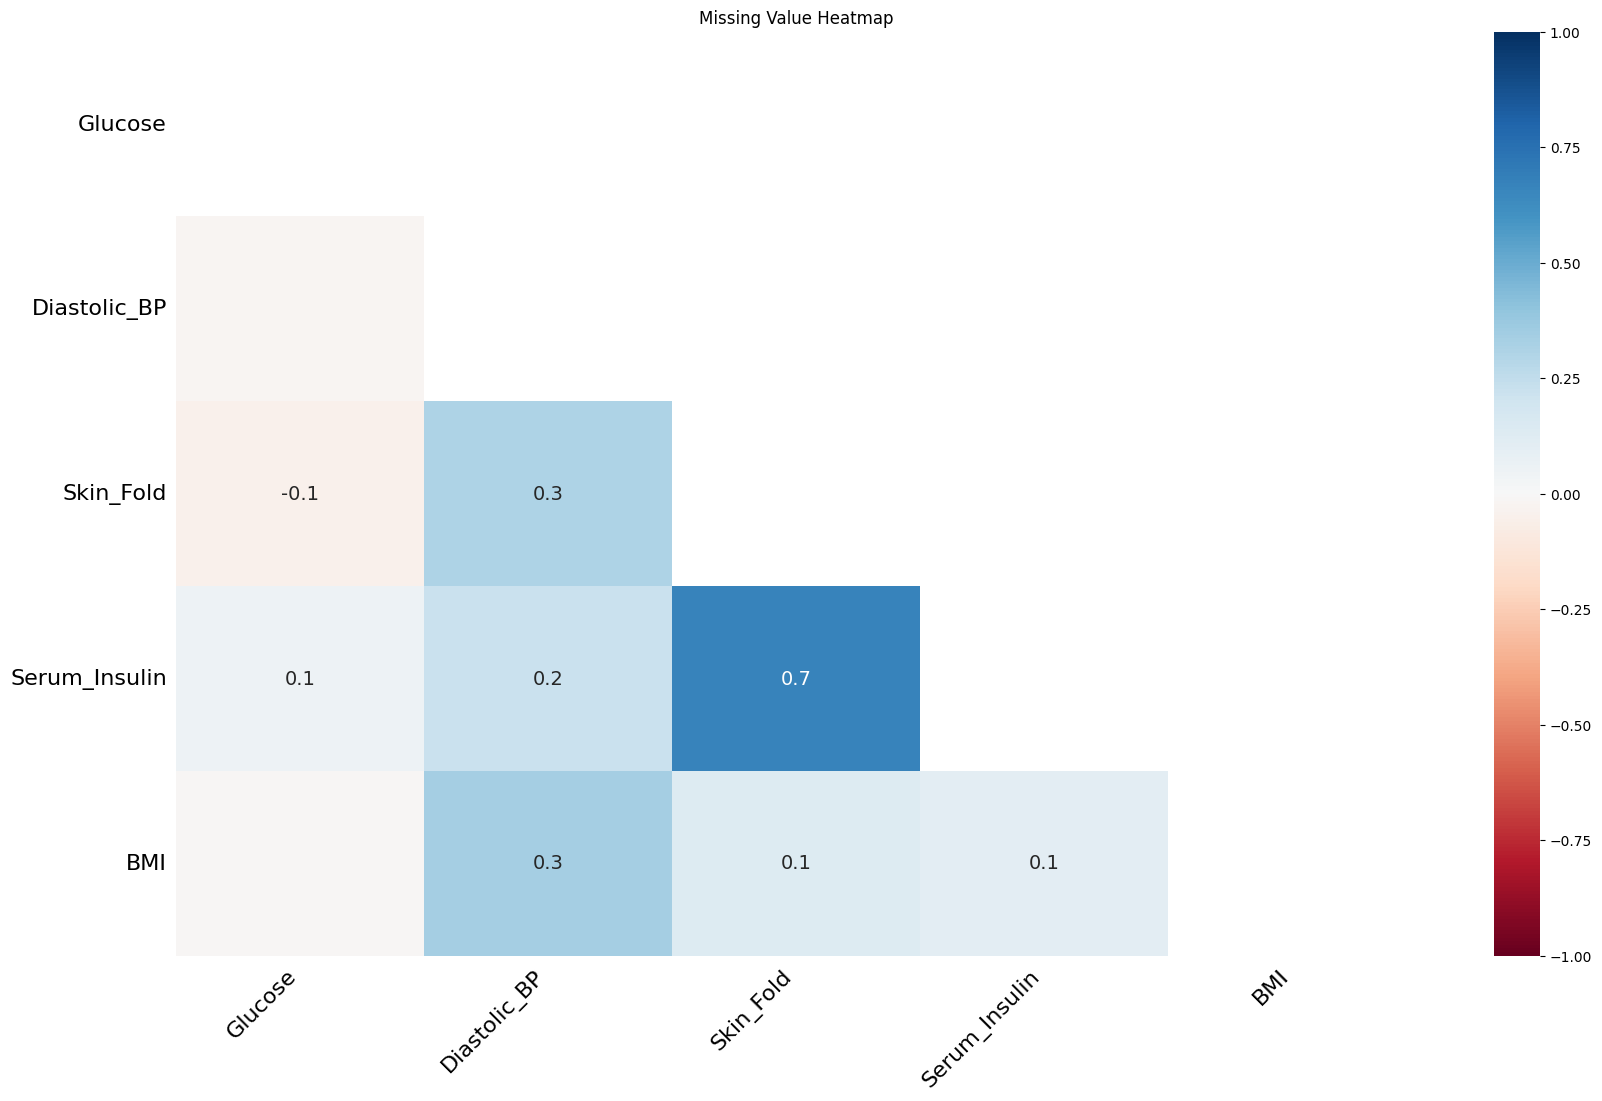

In [4]:
# Missing Value Analysis & NaN Replacement
missing_report = pipeline.missing_value_analysis()

print("\nMissing Data Percentages After Zero-to-NaN Conversion:")
print(pd.DataFrame(missing_report, index=['Percent']).T.sort_values(by='Percent', ascending=False))

print("\n")
msno.matrix(pipeline.df)
plt.title("Missing Value Matrix (NaNs)")
plt.show()

print("\n")
msno.heatmap(pipeline.df)
plt.title("Missing Value Heatmap")
plt.show()


--- Imputation Strategy: **MEDIAN** ---
Imputed **Glucose** with the **median** value: 117.00
Imputed **Diastolic_BP** with the **median** value: 72.00
Imputed **Skin_Fold** with the **median** value: 29.00
Imputed **Serum_Insulin** with the **median** value: 125.00
Imputed **BMI** with the **median** value: 32.30

Missing values after imputation:
Pregnant             0
Glucose              0
Diastolic_BP         0
Skin_Fold            0
Serum_Insulin        0
BMI                  0
Diabetes_Pedigree    0
Age                  0
Class                0
dtype: int64


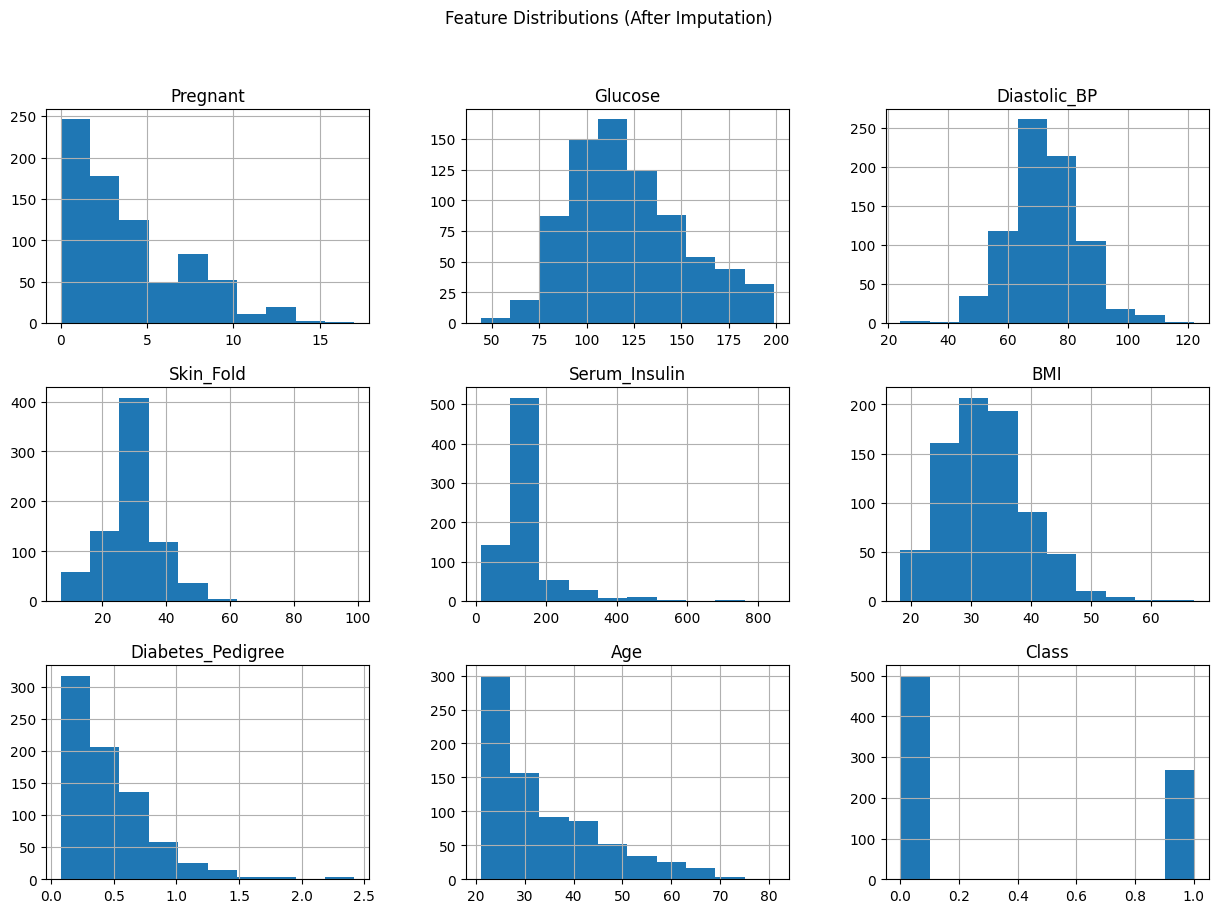

In [5]:
# Impute Missing Values
pipeline.impute_data(strategy='median') 

pipeline.df.hist(figsize=(15, 10))
plt.suptitle("Feature Distributions (After Imputation)")
plt.show()


--- Outlier Treatment: **IQR** (using **capping**) ---
**Diastolic_BP** has **14** outliers (IQR method).
  -> Outliers capped between **40.00** and **104.00**.
**Skin_Fold** has **87** outliers (IQR method).
  -> Outliers capped between **14.50** and **42.50**.
**Serum_Insulin** has **346** outliers (IQR method).
  -> Outliers capped between **112.88** and **135.88**.
**BMI** has **8** outliers (IQR method).
  -> Outliers capped between **13.85** and **50.25**.
**Diabetes_Pedigree** has **29** outliers (IQR method).
  -> Outliers capped between **-0.33** and **1.20**.
**Age** has **9** outliers (IQR method).
  -> Outliers capped between **-1.50** and **66.50**.


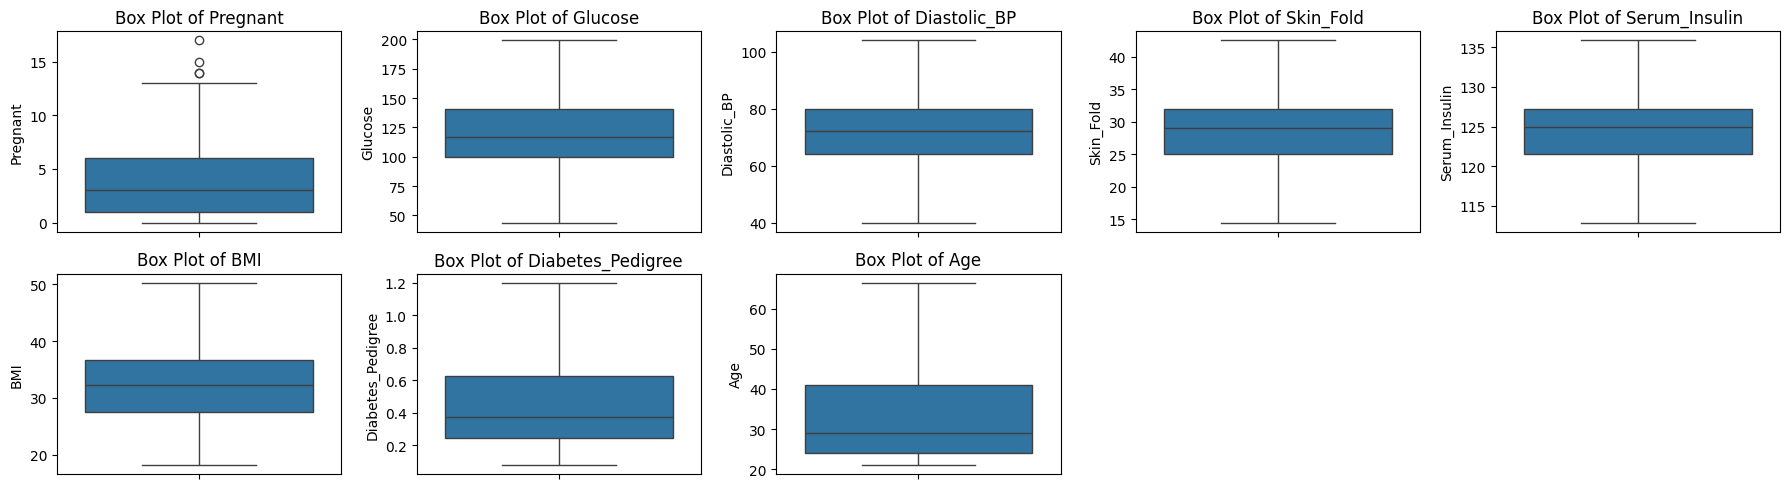

In [6]:
# Outlier Detection & Treatment
pipeline.outlier_treatment(method='IQR', cap_method='capping') 
plt.figure(figsize=(18, 5))
for i, col in enumerate(pipeline.df.drop(columns=['Class']).columns):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(y=pipeline.df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


--- Feature Engineering ---
-> Created **Age_Group** feature.
-> Created **BMI_Category** feature.
-> Created **Glucose_Category** feature.

Dropped original 'Age', 'BMI', and 'Glucose' features.

DataFrame head after Feature Engineering:


,Pregnant,Diastolic_BP,Skin_Fold,Serum_Insulin,Diabetes_Pedigree,Class,Age_Group,BMI_Category,Glucose_Category
0,6,72.0,35.0,125.000,0.627,1,Senior,Obese,Pre_Diabetic
1,1,66.0,29.0,125.000,0.351,0,Middle-Aged,Overweight,Normal_Glucose
2,8,64.0,29.0,125.000,0.672,1,Middle-Aged,Normal,Pre_Diabetic
3,1,66.0,23.0,112.875,0.167,0,Young,Overweight,Normal_Glucose
4,0,40.0,35.0,135.875,1.200,1,Middle-Aged,Obese,Normal_Glucose


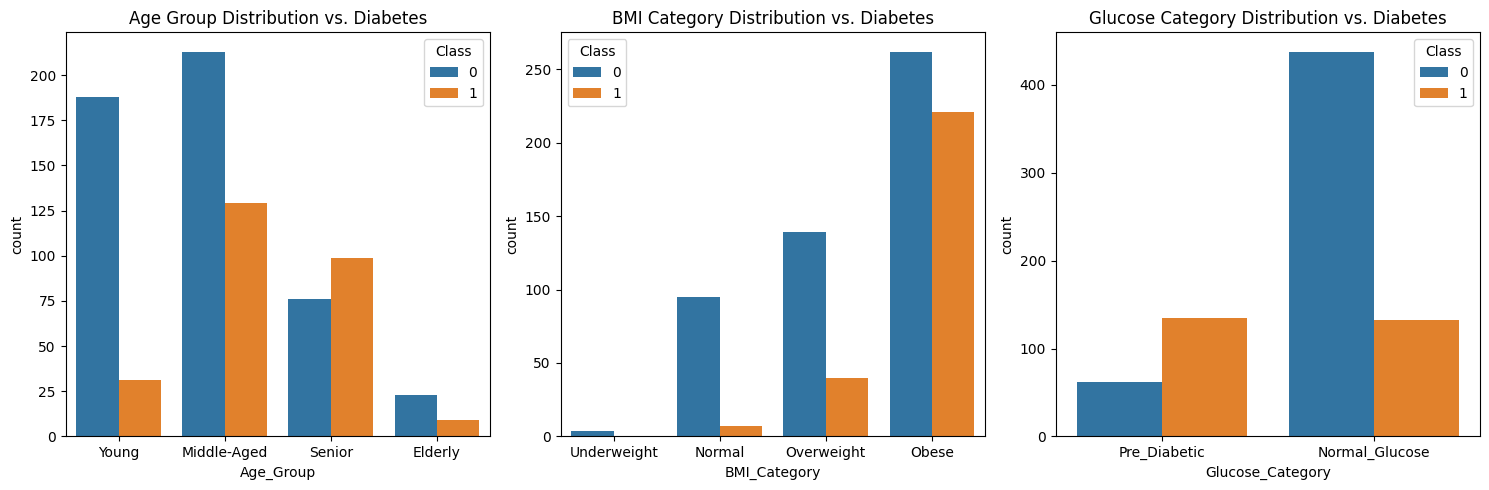

In [7]:
# Feature Engineering
pipeline.feature_engineering()

print("\nDataFrame head after Feature Engineering:")
display(pipeline.df.head())

print("\n")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Age_Group', data=pipeline.df, hue='Class')
plt.title('Age Group Distribution vs. Diabetes')

plt.subplot(1, 3, 2)
sns.countplot(x='BMI_Category', data=pipeline.df, hue='Class')
plt.title('BMI Category Distribution vs. Diabetes')

plt.subplot(1, 3, 3)
sns.countplot(x='Glucose_Category', data=pipeline.df, hue='Class')
plt.title('Glucose Category Distribution vs. Diabetes')

plt.tight_layout()
plt.show()

In [8]:
#  Encoding
pipeline.feature_encoding()

print("\nDataFrame head after Encoding:")
display(pipeline.df.head())

print("\nData Types after Encoding:")
print(pipeline.df.dtypes)


--- Feature Encoding ---
-> Applied **Label Encoding** to Age_Group and BMI_Category.
-> Applied **One-Hot Encoding** to Glucose_Category.

DataFrame head after Encoding:


,Pregnant,Diastolic_BP,Skin_Fold,Serum_Insulin,Diabetes_Pedigree,Class,Age_Group_Encoded,BMI_Category_Encoded,Glucose_Normal_Glucose,Glucose_Pre_Diabetic
0,6,72.0,35.0,125.000,0.627,1,2,3,False,True
1,1,66.0,29.0,125.000,0.351,0,1,2,True,False
2,8,64.0,29.0,125.000,0.672,1,1,1,False,True
3,1,66.0,23.0,112.875,0.167,0,0,2,True,False
4,0,40.0,35.0,135.875,1.200,1,1,3,True,False



Data Types after Encoding:
Pregnant                     int64
Diastolic_BP               float64
Skin_Fold                  float64
Serum_Insulin              float64
Diabetes_Pedigree          float64
Class                        int64
Age_Group_Encoded         category
BMI_Category_Encoded      category
Glucose_Normal_Glucose        bool
Glucose_Pre_Diabetic          bool
dtype: object



--- Feature Scaling (Method: **StandardScaler**) ---
Features being scaled: ['Pregnant', 'Diastolic_BP', 'Skin_Fold', 'Serum_Insulin', 'Diabetes_Pedigree']
-> Applied StandardScaler to numerical features.

DataFrame head after **StandardScaler** Scaling:


,Pregnant_Scaled,Diastolic_BP_Scaled,Skin_Fold_Scaled,Serum_Insulin_Scaled,Diabetes_Pedigree_Scaled,Age_Group_Encoded,BMI_Category_Encoded,Glucose_Normal_Glucose,Glucose_Pre_Diabetic,Class
0,0.639947,-0.030632,0.824667,0.039062,0.588927,2,3,False,True,1
1,-0.844885,-0.543914,0.017945,0.039062,-0.378101,1,2,True,False,0
2,1.23388,-0.715008,0.017945,0.039062,0.746595,1,1,False,True,1
3,-0.844885,-0.543914,-0.788777,-1.49411,-1.022787,0,2,True,False,0
4,-1.141852,-2.768136,0.824667,1.414175,2.596563,1,3,True,False,1


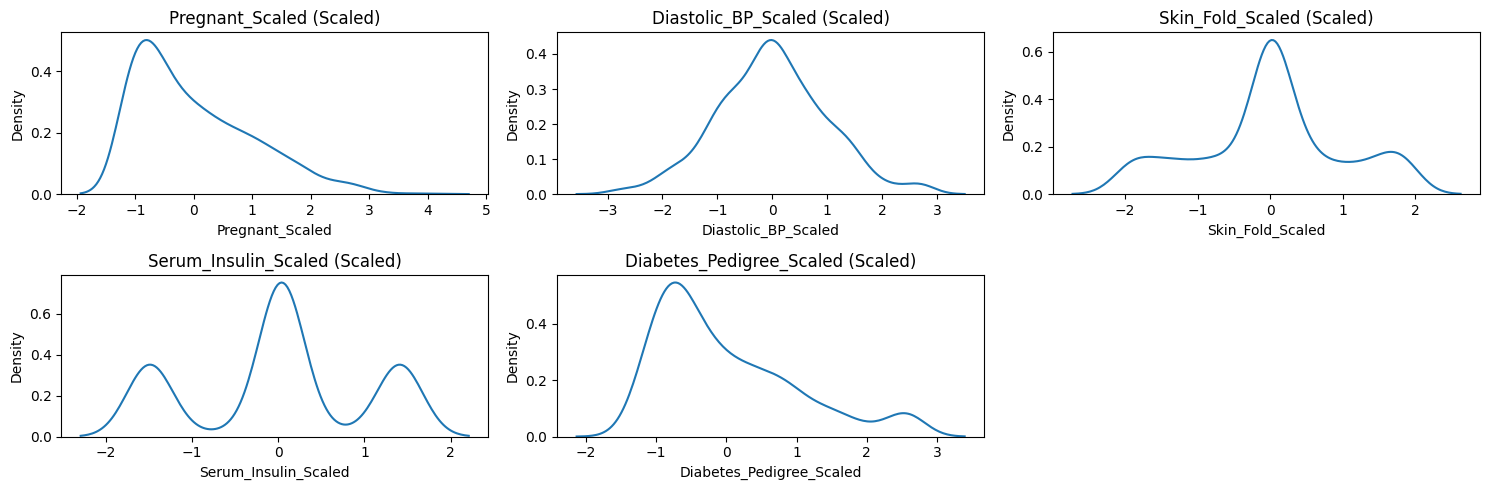


Verification of Scaled Features (Mean/Std Dev):
                                  mean       std
Pregnant_Scaled           2.544261e-17  1.000652
Diastolic_BP_Scaled      -3.807357e-16  1.000652
Skin_Fold_Scaled          1.492585e-16  1.000652
Serum_Insulin_Scaled     -5.512445e-16  1.000652
Diabetes_Pedigree_Scaled -2.302845e-16  1.000652


In [9]:
#  Scaling
SCALING_METHOD = 'StandardScaler' 
pipeline.feature_scaling(scaler_type=SCALING_METHOD)

print(f"\nDataFrame head after **{SCALING_METHOD}** Scaling:")
display(pipeline.df.head())


scaled_cols = [col for col in pipeline.df.columns if '_Scaled' in col]
plt.figure(figsize=(15, 5))
for i, col in enumerate(scaled_cols[:5]): 
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(pipeline.df[col])
    plt.title(f'{col} (Scaled)')

plt.tight_layout()
plt.show()

print("\nVerification of Scaled Features (Mean/Std Dev):")
print(pipeline.df[scaled_cols].agg(['mean', 'std']).T.head())


--- Feature Selection ---

**1. Correlation Analysis:**
Correlation with Target ('Class'):
Class                       1.000000
Glucose_Pre_Diabetic        0.414455
BMI_Category_Encoded        0.309762
Serum_Insulin_Scaled        0.266382
Age_Group_Encoded           0.261970
Pregnant_Scaled             0.221898
Skin_Fold_Scaled            0.220111
Diabetes_Pedigree_Scaled    0.184969
Diastolic_BP_Scaled         0.168971
Glucose_Normal_Glucose     -0.414455
Name: Class, dtype: float64

**2. SelectKBest (k=10) with Mutual Information:**
Top 10 features selected by SelectKBest (scores):
Glucose_Pre_Diabetic        0.117722
Glucose_Normal_Glucose      0.071974
Age_Group_Encoded           0.049823
BMI_Category_Encoded        0.041153
Pregnant_Scaled             0.032597
Skin_Fold_Scaled            0.016433
Serum_Insulin_Scaled        0.010279
Diabetes_Pedigree_Scaled    0.000000
Diastolic_BP_Scaled         0.000000
dtype: float64

DataFrame shape after feature selection: (768, 10)


c:\Users\Is lab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=10 is greater than n_features=9. All the features will be returned.
  warnings.warn(


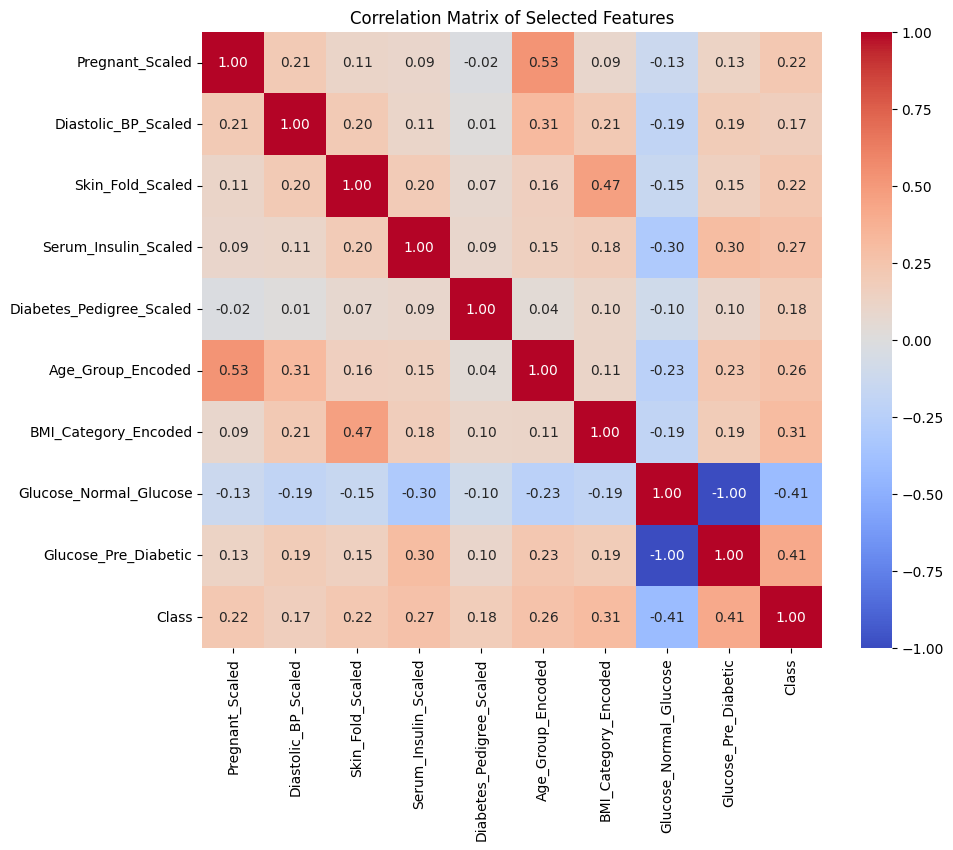

In [10]:
# Feature Selection

K_FEATURES = 10 
pipeline.feature_selection(k_features=K_FEATURES)


plt.figure(figsize=(10, 8))
sns.heatmap(pipeline.df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Selected Features")
plt.show() 


--- Dimensionality Reduction (PCA) ---
Variance Explained by each principal component:
Component 1: 0.2815 (Cumulative: 0.2815)
Component 2: 0.1743 (Cumulative: 0.4558)
Component 3: 0.1429 (Cumulative: 0.5987)
Component 4: 0.1316 (Cumulative: 0.7303)
Component 5: 0.1152 (Cumulative: 0.8454)
Component 6: 0.0560 (Cumulative: 0.9015)
Component 7: 0.0544 (Cumulative: 0.9559)
Component 8: 0.0441 (Cumulative: 1.0000)
Component 9: 0.0000 (Cumulative: 1.0000)

Optimal number of components to explain >90% variance: **6**


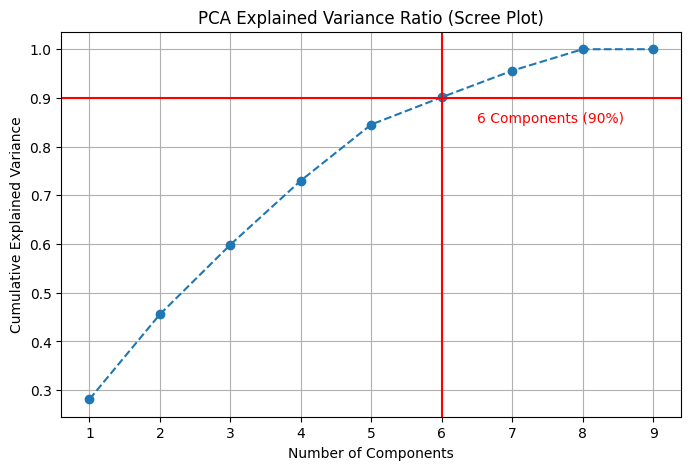

In [11]:
# Dimensionality Reduction (PCA)
cumulative_variance = pipeline.dimensionality_reduction()


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pipeline.pca_cumulative_variance) + 1), pipeline.pca_cumulative_variance, 
         marker='o', linestyle='--')
plt.title('PCA Explained Variance Ratio (Scree Plot)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)


percent_90_index = np.where(cumulative_variance >= 0.90)[0][0]
plt.axvline(x=percent_90_index + 1, color='r', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(percent_90_index + 1.5, 0.85, f'{percent_90_index + 1} Components (90%)', color='r')
plt.show() # 




--- Class Distribution Analysis ---
Target Class Counts:
Class
0    500
1    268
Name: count, dtype: int64

Imbalance Ratio (Majority / Minority): **1.87**
Percentage of Minority Class (1/Diabetic): 34.90%


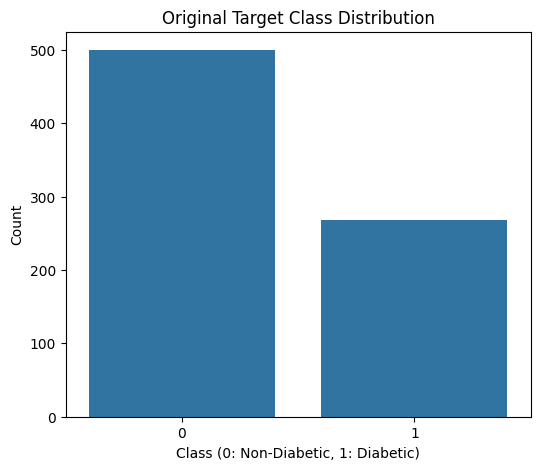

In [12]:
# Class Distribution Analysis
class_counts = pipeline.class_distribution_analysis()


plt.figure(figsize=(6, 5))
sns.countplot(x='Class', data=pipeline.df)
plt.title('Original Target Class Distribution')
plt.xlabel('Class (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show() #


--- Data Imbalance Handling (Method: **SMOTE**) ---
Original samples: 768
Resampled samples: 1000

Class distribution after SMOTE:
Class
1    500
0    500
Name: count, dtype: int64

Data balancing complete. The final processed dataset is ready.


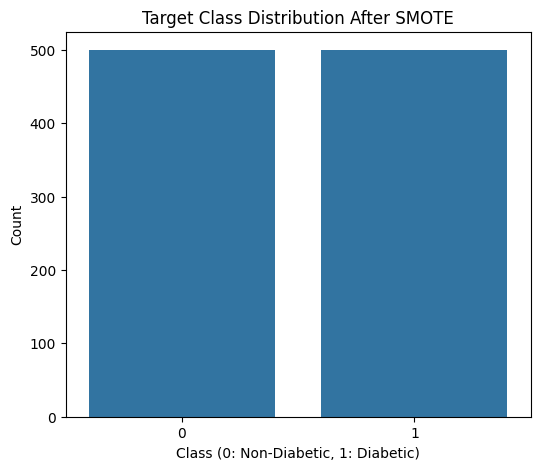

In [13]:
#  Balancing Techniques (SMOTE)
pipeline.handle_imbalance(method='SMOTE')


plt.figure(figsize=(6, 5))
sns.countplot(x='Class', data=pipeline.df)
plt.title('Target Class Distribution After SMOTE')
plt.xlabel('Class (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show() #

In [14]:
# Save the Final Clean Dataset 
pipeline.save_final_dataset()

# Display the final prepared dataset structure
print("\n--- Final Processed DataFrame ---")
display(pipeline.df.head())
print(f"Final shape: {pipeline.df.shape}")
print(f"Final Features: {pipeline.df.columns.tolist()}")



**Final Clean Dataset saved to: ../data/final_processed_diabetes_data.csv**

Data Dictionary:
| Feature                  | Description                                         |
|:-------------------------|:----------------------------------------------------|
| Pregnant_Scaled          | Number of times pregnant (Scaled)                   |
| Diastolic_BP_Scaled      | Plasma glucose concentration (Scaled)               |
| Skin_Fold_Scaled         | Diastolic blood pressure (Scaled)                   |
| Serum_Insulin_Scaled     | Triceps skin fold thickness (Scaled)                |
| Diabetes_Pedigree_Scaled | 2-Hour serum insulin (Scaled)                       |
| Age_Group_Encoded        | Diabetes pedigree function (Scaled)                 |
| BMI_Category_Encoded     | Label-encoded Age Group (0=Young, 3=Elderly)        |
| Glucose_Normal_Glucose   | Label-encoded BMI Category (0=Underweight, 3=Obese) |
| Glucose_Pre_Diabetic     | One-Hot Encoded: Normal Glucose Level         

,Pregnant_Scaled,Diastolic_BP_Scaled,Skin_Fold_Scaled,Serum_Insulin_Scaled,Diabetes_Pedigree_Scaled,Age_Group_Encoded,BMI_Category_Encoded,Glucose_Normal_Glucose,Glucose_Pre_Diabetic,Class
0,0.639947,-0.030632,0.824667,0.039062,0.588927,2.0,3.0,0.0,1.0,1
1,-0.844885,-0.543914,0.017945,0.039062,-0.378101,1.0,2.0,1.0,0.0,0
2,1.23388,-0.715008,0.017945,0.039062,0.746595,1.0,1.0,0.0,1.0,1
3,-0.844885,-0.543914,-0.788777,-1.49411,-1.022787,0.0,2.0,1.0,0.0,0
4,-1.141852,-2.768136,0.824667,1.414175,2.596563,1.0,3.0,1.0,0.0,1


Final shape: (1000, 10)
Final Features: ['Pregnant_Scaled', 'Diastolic_BP_Scaled', 'Skin_Fold_Scaled', 'Serum_Insulin_Scaled', 'Diabetes_Pedigree_Scaled', 'Age_Group_Encoded', 'BMI_Category_Encoded', 'Glucose_Normal_Glucose', 'Glucose_Pre_Diabetic', 'Class']
